<a href="https://colab.research.google.com/github/ShrikantAhire/shiny-fiesta/blob/main/MNIST_Digit_Classification_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the Dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
#loading mnist data from keras.datasets
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
#shape of numpy array
print((X_train.shape, Y_train.shape),(X_test.shape, Y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


In [6]:
#print the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(X_train[10].shape)

(28, 28)


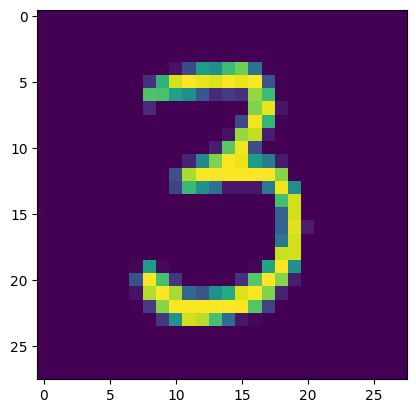

3


In [16]:
#display the image
plt.imshow(X_train[50])
plt.show()

#print the corresponding label
print(Y_train[50])

In [17]:
#label Labels
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [18]:
#unique values in Y_train
print(np.unique(Y_train))
#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can use use one hot encoding

All the images in this dataset have same dimensions otherwise we could use resize function to  maintain similar dimension  

In [21]:
 #scaling the values
#0/255 => 0
#255/255 =>1
 X_train=X_train/255
 X_test=X_test/255

In [22]:
 print(X_train[10])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

Building the neural network

In [23]:
#setting layers of the newral network

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])

In [24]:
#Compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
#train our model
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9932 - accuracy: 0.6824
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4673 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3717 - accuracy: 0.8932
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3381 - accuracy: 0.9024
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3171 - accuracy: 0.9078
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2990 - accuracy: 0.9122
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2828 - accuracy: 0.9179
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9218
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2525 - accuracy: 0.9260
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

Training data accuracy: 0.9301

In [26]:
loss, accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2305 - accuracy: 0.9319
0.9319000244140625


Test data accuracy: 0.9319

In [27]:
print(loss)

0.23053398728370667


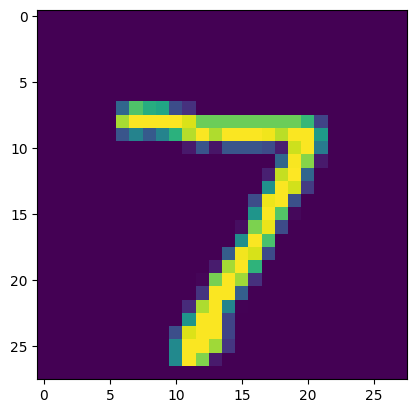

In [28]:
#first data pointin X_test
plt.imshow(X_test[0])

In [29]:
print(Y_test[0])

7


In [30]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [31]:
print(Y_pred[0])

[1.2032514e-01 2.8826957e-04 3.3100569e-01 9.0813661e-01 2.7050697e-05
 2.1059586e-01 5.5875251e-09 9.9932760e-01 4.1288909e-02 4.8197550e-01]


In [36]:
#converting the prediction probablities to class labels
label_for_first_image=np.argmax(Y_pred[0])

In [37]:
label_for_first_image

7

In [38]:
#converting the prediction probablities to class label for all test data points
Y_pred_lables = [np.argmax(i) for i in Y_pred]
print(Y_pred_lables)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 9, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 5, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 1, 7, 9, 3, 9, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test => True Labels

Y_pred_lables => Predicted labels

Confusion Matrix

In [40]:
conf_mat=confusion_matrix(Y_test,Y_pred_lables)

In [41]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    0,    1,    1,    8,    8,    3,    3,    1],
       [   0, 1112,    3,    2,    1,    3,    3,    1,   10,    0],
       [  11,    6,  932,   15,    7,    2,   15,   13,   29,    2],
       [   1,    1,   19,  921,    1,   40,    0,    9,   15,    3],
       [   1,    3,    7,    0,  926,    0,    5,    3,    6,   31],
       [   7,    3,    4,   21,    6,  808,   11,    1,   25,    6],
       [  11,    3,    4,    0,   12,   19,  906,    0,    3,    0],
       [   3,   10,   20,    5,    5,    1,    0,  959,    1,   24],
       [   2,    8,    2,   21,   14,   31,   11,    8,  871,    6],
       [   9,    9,    1,    9,   28,   10,    0,    7,    7,  929]],
      dtype=int32)>

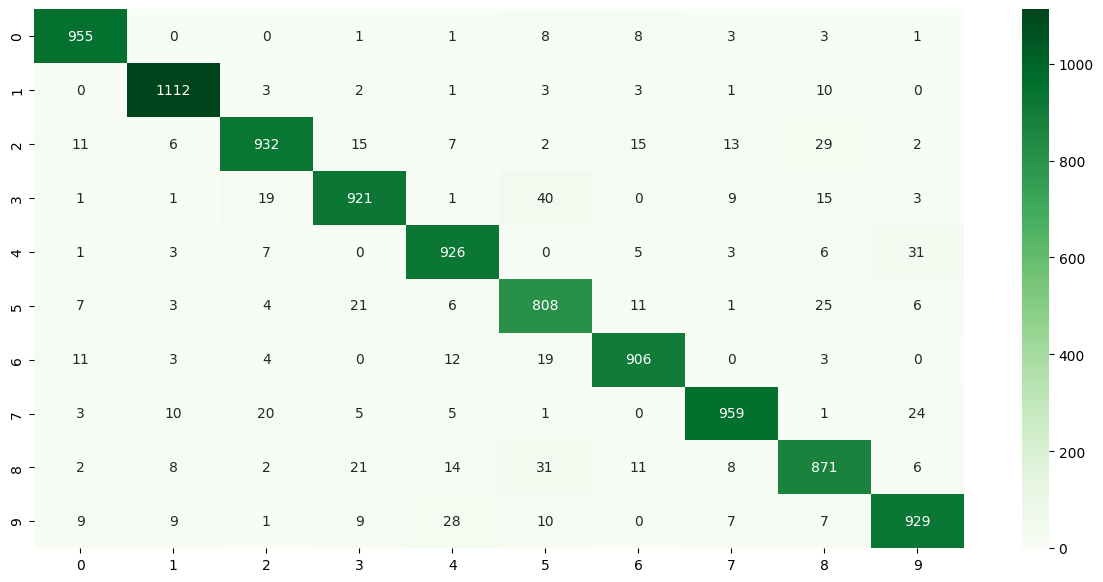

In [44]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Greens')
plt.ylabel=('True Labels')
plt.xlabel=('Predicted Labels')